In [7]:
import pandas as pd
import numpy as np
 
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
 
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
 
from sklearn import metrics

%matplotlib inline
np.random.seed(27)
#rcParams['figure.figsize'] = 10, 6
#warnings.filterwarnings('ignore')
#sns.set(style="darkgrid")

In [8]:
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

In [9]:
train['Credit_Product']=train['Credit_Product'].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [10]:
test['Credit_Product']=test['Credit_Product'].astype(str)

In [11]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
train['Gender']= le.fit_transform(train['Gender'])
train['Occupation']= le.fit_transform(train['Occupation'])
train['Credit_Product']= le.fit_transform(train['Credit_Product'])
train['Vintage']= le.fit_transform(train['Vintage'])
train['Region_Code']= le.fit_transform(train['Region_Code'])
train['Channel_Code']= le.fit_transform(train['Channel_Code'])
train['Age']= le.fit_transform(train['Age'])
train['Is_Lead']= le.fit_transform(train['Is_Lead'])
train['Is_Active']= le.fit_transform(train['Is_Active'])
train['ID']= le.fit_transform(train['ID'])

In [12]:
test['Gender']= le.fit_transform(test['Gender'])
test['Occupation']= le.fit_transform(test['Occupation'])
test['Credit_Product']= le.fit_transform(test['Credit_Product'])
test['Vintage']= le.fit_transform(test['Vintage'])
test['Region_Code']= le.fit_transform(test['Region_Code'])
test['Channel_Code']= le.fit_transform(test['Channel_Code'])
test['Age']= le.fit_transform(test['Age'])
test['Is_Active']= le.fit_transform(test['Is_Active'])
test['ID']= le.fit_transform(test['ID'])

In [13]:
y=train.iloc[:,10:]
x=train.iloc[:,0:10]

In [14]:
test=test.iloc[:,0:10]

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [16]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [17]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

0    187437
1     58288
Name: Is_Lead, dtype: int64


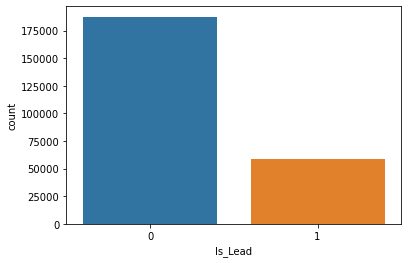

In [18]:
target = 'Is_Lead'
df1=train.copy()
X = df1.loc[:, df1.columns!=target]
Y = df1.loc[:, df1.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=60)
ax = sns.countplot(x=df1.Is_Lead, data=df1)
print(df1[target].value_counts())

In [19]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [22]:
logreg.fit(X_train,Y_train)
y_pred_train = logreg.predict(X_test)

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
generate_model_report(Y_test, y_pred_train)

Accuracy =  0.7431495868787766
Precision =  0.37351015611885174
Recall =  0.11515967082449148
F1 Score =  0.17604240841838753


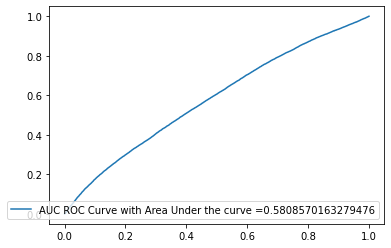

In [25]:
generate_auc_roc_curve(logreg, X_test)

In [26]:
import xgboost as xg
from xgboost import XGBClassifier
 
clf2 = xg.XGBClassifier(class_weight='balanced').fit(X_train, Y_train)

C:\Users\AS20188795\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
clf2 = xg.XGBClassifier(class_weight='balanced').fit(X_train, Y_train)

[15:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=69020     1
231719    0
78458     1
198158    0
139279    1
         ..
174179    0
6543      0
241222    0
232513    0
133325    0
Name: Is_Lead, Length: 164635, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.65503947, 2.11249262])

In [29]:
Y_Test_Pred = clf2.predict(X_test)

C:\Users\AS20188795\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [30]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8591194968553459
Precision =  0.7919408502772644
Recall =  0.554370891775788
F1 Score =  0.6521950922486757


C:\Users\AS20188795\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


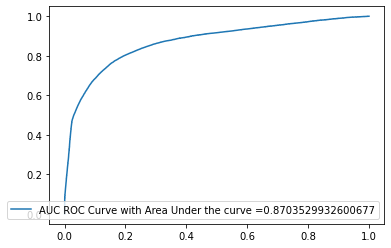

In [31]:
generate_auc_roc_curve(clf2, X_test)

In [ ]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')

In [ ]:
final_prediction=clf2.predict_proba(input_1)[:, 1]

In [ ]:
submission['Is_Lead'] = final_prediction

In [ ]:
submission.to_csv('sample_submission_eyYijxG.csv', index=False)